# Generating GIFs
If you provide a function that renders each state of a model to an image, you can extract a GIF from this. The previous notebook with gymnasium was an example of this, but you can do it for any model! You can either provide a scheduler, or a path.

In this example, we will generate an image from the die dtmc; the initial state is a question mark and the outcomes of the die are a picture of the die.

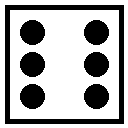

In [1]:
from stormvogel import *
from time import sleep
import IPython.display as ipd

for i in range(7):
    ipd.clear_output(wait=True)
    ipd.display(examples.generate_dice_image(i))
    sleep(0.5)

In [2]:
def state_to_image(s: State):
    if s.is_initial():
        return examples.generate_dice_image(0) # Question mark.
    else:
        return examples.generate_dice_image(s.features["rolled"]) # Die image

In [3]:
mdp = examples.create_die_dtmc()
vis = show(mdp, layout=Layout("layouts/die.json"))

Output()

<IPython.core.display.Javascript object>

Output()

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 35136)
Traceback (most recent call last):
  File "/usr/lib/python3.12/socketserver.py", line 318, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.12/socketserver.py", line 349, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.12/socketserver.py", line 362, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.12/socketserver.py", line 761, in __init__
    self.handle()
  File "/usr/lib/python3.12/http/server.py", line 436, in handle
    self.handle_one_request()
  File "/usr/lib/python3.12/http/server.py", line 424, in handle_one_request
    method()
  File "/home/ivo/git/stormvogel/env/lib/python3.12/site-packages/stormvogel/communication_server.py", line 82, in do_POST
    f = events[id]
        ~~~~~~^^^^
KeyError: 'BvjficWsGQOXLZlS

Now when we roll the die, we start in the initial state (question mark), and we go to a state where we rolled a result.

In [4]:
# Try reloading this cell, it may give a different dice roll.

import IPython.display as ipd
filename = extensions.render_model_gif(mdp, state_to_image, None, None)
extensions.embed_gif(filename)
#ipd.display(ipd.HTML(f""" <img src="{filename}" onerror="this.onerror=null; this.src='/_static/my_gif.gif';"> """))